## Introduction

The word **recommend** is a very common word used by us when we for instance want to watch a new movie, series or anime but don't know what to choose from . Maybe you want to listen to a new genre, let's say Kpop but don't know which song to start listening to or you really liked playing Call of Duty:Black Ops and don't know what to play next. 
When we are provided by numerous choices, we often tend to seek for an opinion or a recommendation let's say a person or a platform (Netflix or Spotify) and also expect that we like it.

But there are moments we don't like the recommendations given to us. That's why understanding a customer, user or individual as well as their tastes/choices is essential before recommending something.

In this project I am going to use a dataset that was available at Kaggle and develop a game recommender system.

## Data Acquisition and Data Cleaning

Data Acquisition involves, importing data as well as its libraries, reading and understanding the data given. 

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data 
from google.colab import files
uploaded = files.upload()

Saving imdb_video_game_rating.csv to imdb_video_game_rating.csv


In [ ]:
df = pd.read_csv('imdb_video_game_rating.csv')

In [ ]:
#view the data
df.head()

,Unnamed: 0,title,year,genre,rating,votes,directors,plot
0,0,The Last of Us: Part I,2022,"Action, Adventure, Drama",9.8,601,"Matthew Gallant, Bruce Straley",Experience the emotional storytelling and unfo...
1,1,Red Dead Redemption II,2018,"Action, Adventure, Crime",9.7,"36,441",Missing,Amidst the decline of the Wild West at the tur...
2,2,The Witcher 3: Wild Hunt - Blood and Wine,2016,"Action, Adventure, Drama",9.7,"7,610",Konrad Tomaszkiewicz,Geralt is in the southern province of Toussain...
3,3,The Witcher 3: Wild Hunt,2015,"Action, Adventure, Drama",9.7,"26,328",Konrad Tomaszkiewicz,A monster hunter for hire embarks on an epic j...
4,4,The Last of Us,2013,"Action, Adventure, Drama",9.7,"61,103","Neil Druckmann, Bruce Straley","In a hostile, post-pandemic world, Joel and El..."


In [ ]:
#select a random sample of 1500 rows
df = df.sample(1500)

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
# Convert year columns to integers
years= df.year.value_counts().index
display(years)

Index(['2015', '2016', '2012', '2014', '1999', '2004', '2018', '2010', '2019',
       '2002', '2013', '2001', '2005', '2003', '2017', '2000', '2009', '2007',
       '2020', '2011', '1998', '1994', '1993', '1996', '2021', '1997', '2008',
       '1995', '1990', '2006', '1987', '1992', '1988', '1989', '1991', '1984',
       '1986', '1985', '1981', '2022', 'I)', '1982', '1980', '1983', '1978',
       '1972', 'II)', '1979', 'III)', '1977', 'Video', '1976', '1962', '1971'],
      dtype='object')

In [ ]:
# Extract incorrect years that do not start with 1 or 2
incorrect_years = [year for year in years if (not year.startswith('1')) if (not year.startswith('2'))]

#Show incorrect years
display('Incorrect years',incorrect_years)

'Incorrect years'

['I)', 'II)', 'III)', 'Video']

In [ ]:
# Convert incorrect values to nan
df.loc[df['year'].isin(incorrect_years),'year'] = np.nan

In [ ]:
# Convert the year column to numeric. 
# Converting to integer type outputs an error due to presence of null values
df['year'] = df['year'].astype('float')

# Let's create a decade column to show the decade when the game was launched
df['decade'] = df['year'].round(-1)

In [ ]:
# Convert the votes column to integer
df['votes'] = df.votes.apply(lambda x: x.replace(',','')).astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 4616 to 8578
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1500 non-null   object 
 1   year             1485 non-null   float64
 2   genre            1500 non-null   object 
 3   rating           1500 non-null   float64
 4   votes            1500 non-null   int64  
 5   directors        1500 non-null   object 
 6   plot             1500 non-null   object 
 7   decade           1485 non-null   float64
 8   weighted_rating  1500 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 117.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 4616 to 8578
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1500 non-null   object 
 1   year             1485 non-null   float64
 2   genre            1500 n

In [ ]:
df.head(5)

,title,year,genre,rating,votes,directors,plot,decade
4616,Cube Escape: Arles,2015.0,Mystery,7.5,12,"Maarten Looise, Robin Ras",You find yourself trapped inside your bedroom ...,2020.0
3052,Con Man: The Game,2016.0,"Animation, Adventure, Comedy",7.8,28,Missing,"Based on Con Man, the American comedy web seri...",2020.0
3303,Fantasy General,1996.0,"Action, Adventure, Fantasy",7.8,13,Missing,Spin-Off from the popular 5-Star General serie...,2000.0
7465,Outlander,1992.0,Action,6.9,34,Missing,Missing,1990.0
5005,Dragon Quest Heroes: The World Tree's Woe and ...,2015.0,"Adventure, Fantasy",7.4,134,"Yuji Horii, Tomohiko Sho","In the kingdom of Elsarze, mankind and monster...",2020.0


The famous IMDB uses this weighted rating formula:

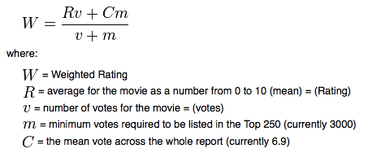

We will therefore create a function that calculates the weighted rating for each movie.

In [ ]:
## calculate the weighted rating
def weighted_rating(x,m=3000,C=6.9):
  v = x['votes']
  R = x['rating']

  return (v/(v+m) * R) + (m/(m+v) * C)
df['weighted_rating'] = df.apply(weighted_rating,axis = 1)

In [ ]:
df[['title','decade','votes','rating','weighted_rating']].head(5)

,title,decade,votes,rating,weighted_rating
4616,Cube Escape: Arles,2020.0,12,7.5,6.902390
3052,Con Man: The Game,2020.0,28,7.8,6.908322
3303,Fantasy General,2000.0,13,7.8,6.903883
7465,Outlander,1990.0,34,6.9,6.900000
5005,Dragon Quest Heroes: The World Tree's Woe and ...,2020.0,134,7.4,6.921378


## Exploratory Data Analysis

### Games produced per Decade


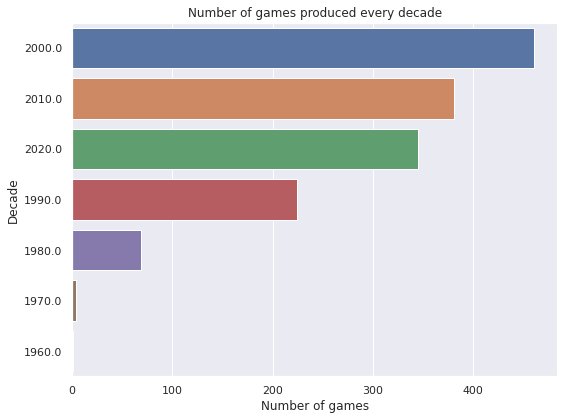

In [ ]:
# Visualize the number of games for each decade using a countplot
sns.set(style = 'darkgrid')
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(y='decade',data=df,order = df['decade'].value_counts().index)
ax.set(title='Number of games produced every decade', ylabel='Decade',xlabel='Number of games')
plt.tight_layout()
plt.show()

There is an increase in the number of games produced each decade, with its highest production being in the decade of 2000s.

In [ ]:
print('Top 20 Highest rated games')
df.nlargest(20,'weighted_rating')

Top 20 Highest rated games


,title,year,genre,rating,votes,directors,plot,decade,weighted_rating
14,Mass Effect 2,2010.0,"Action, Adventure, Drama",9.5,19961,Casey Hudson,After being revived from death and having to j...,2010.0,9.160294
26,Portal 2,2011.0,"Adventure, Comedy, Sci-Fi",9.4,15687,Missing,"Many years after ""Portal,"" Chell reawakens at ...",2010.0,8.998651
22,Final Fantasy VII,1997.0,"Action, Adventure, Fantasy",9.5,10452,"Yoshinori Kitase, Yasushi Matsumura, Masato Yagi",A former soldier from an evil company joins a ...,2000.0,8.920161
2,The Witcher 3: Wild Hunt - Blood and Wine,2016.0,"Action, Adventure, Drama",9.7,7610,Konrad Tomaszkiewicz,Geralt is in the southern province of Toussain...,2020.0,8.908294
209,Fallout: New Vegas,2010.0,"Action, Adventure, Sci-Fi",8.9,12339,Josh Sawyer,"After surviving a bullet to the head, Courier ...",2010.0,8.508840
194,Life Is Strange,2015.0,"Drama, Mystery, Sci-Fi",8.9,11959,"Raoul Barbet, Michel Koch",An awkward photography student named Max disco...,2020.0,8.498904
289,Heavy Rain,2010.0,"Crime, Drama, Mystery",8.8,13507,David Cage,"As a child goes missing, his father tirelessly...",2010.0,8.454692
388,L.A. Noire,2011.0,"Action, Crime, Drama",8.7,15493,Brendan McNamara,"Cole Phelps, a war hero and rookie cop, moves ...",2010.0,8.407998
200,The Wolf Among Us,2013.0,"Action, Crime, Drama",8.9,7181,"Nick Herman, Jason Latino, Dennis Lenart","As Bigby Wolf, the big bad wolf in human form,...",2010.0,8.310667
456,Halo 2,2004.0,"Action, Adventure, Sci-Fi",8.7,9617,Missing,"As the alien Covenant invade Earth, the Master...",2000.0,8.272006


In [ ]:
print('Top 20 Games with the Highest Votes')
df.nlargest(20,'votes')



Top 20 Games with the Highest Votes


,title,year,genre,rating,votes,directors,plot,decade,weighted_rating
14,Mass Effect 2,2010.0,"Action, Adventure, Drama",9.5,19961,Casey Hudson,After being revived from death and having to j...,2010.0,9.160294
26,Portal 2,2011.0,"Adventure, Comedy, Sci-Fi",9.4,15687,Missing,"Many years after ""Portal,"" Chell reawakens at ...",2010.0,8.998651
388,L.A. Noire,2011.0,"Action, Crime, Drama",8.7,15493,Brendan McNamara,"Cole Phelps, a war hero and rookie cop, moves ...",2010.0,8.407998
1702,Batman Begins,2005.0,"Action, Adventure, Crime",8.2,13760,Missing,You play as Batman and unleash your terror int...,2000.0,7.967303
1541,Batman: Arkham Origins,2013.0,"Action, Adventure, Crime",8.2,13726,"Eric Holmes, Benoit Richer","Years before the Arkham incidents, the neophyt...",2010.0,7.966830
289,Heavy Rain,2010.0,"Crime, Drama, Mystery",8.8,13507,David Cage,"As a child goes missing, his father tirelessly...",2010.0,8.454692
209,Fallout: New Vegas,2010.0,"Action, Adventure, Sci-Fi",8.9,12339,Josh Sawyer,"After surviving a bullet to the head, Courier ...",2010.0,8.508840
194,Life Is Strange,2015.0,"Drama, Mystery, Sci-Fi",8.9,11959,"Raoul Barbet, Michel Koch",An awkward photography student named Max disco...,2020.0,8.498904
22,Final Fantasy VII,1997.0,"Action, Adventure, Fantasy",9.5,10452,"Yoshinori Kitase, Yasushi Matsumura, Masato Yagi",A former soldier from an evil company joins a ...,2000.0,8.920161
456,Halo 2,2004.0,"Action, Adventure, Sci-Fi",8.7,9617,Missing,"As the alien Covenant invade Earth, the Master...",2000.0,8.272006


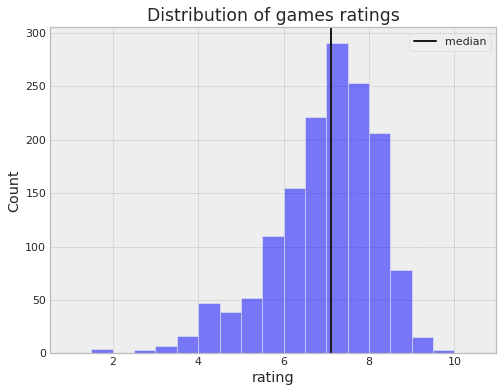

In [ ]:
# Visualize the distribution or rating
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x='rating',data=df,bins=np.arange(1,11,0.5),ax=ax,alpha=0.5)
plt.axvline(df.rating.median(),color='k',ls='-',label='median')
plt.title('Distribution of games ratings')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


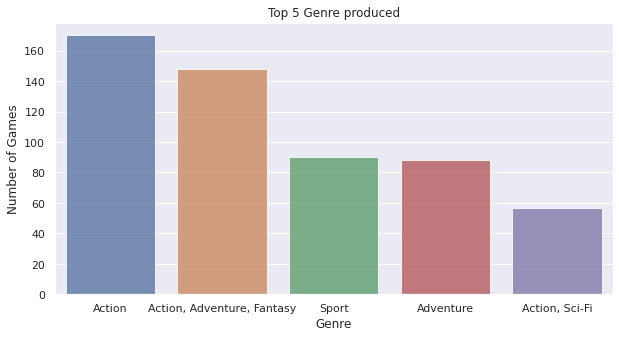

In [ ]:
genre_count = df['genre'].value_counts()
genre_count = genre_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(genre_count.index,genre_count.values,alpha=0.8)
plt.title('Top 5 Genre produced')
plt.ylabel('Number of Games')
plt.xlabel('Genre')
plt.show()

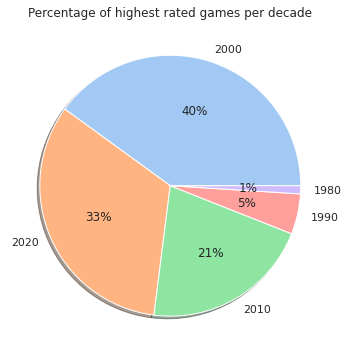

In [ ]:
# Highest Weighted Ratings per Decade
# Which decade produced majority of the lowest 100 rated games
highest_rated_100 = df.loc[df.rating.nlargest(100).index,['decade']].value_counts().reset_index()
highest_rated_100['decade'] = highest_rated_100.decade.astype('int')

# Visualize
sns.set_palette('pastel')
fig, ax = plt.subplots(figsize=(8,6))
plt.pie(highest_rated_100[0],labels=highest_rated_100.decade,shadow=True,autopct='%1.0f%%')
ax.set(title='Percentage of highest rated games per decade')
plt.show()

## Recommender

Recommendation works on two basic concepts;

*   Content-based filtering: User rates a movie or a game that they like(eg: 9/10) and a movie/game from that particular genre will be recommended to them.

*   Collaborative filtering: This is kinda an extensive approach. As the name suggests it finds two similar users meaning similar likings and collabs them.

We are going to focus on **content-based filtering**.

To start with we have to create a function which understands the genre. For a system to understand we need to find a way that it can understand the plot of the game and categorize it to the right genre. To do this we’ll consider the plot of the game.

In [ ]:
df['plot'].head()

4616    You find yourself trapped inside your bedroom ...
3052    Based on Con Man, the American comedy web seri...
3303    Spin-Off from the popular 5-Star General serie...
7465                                              Missing
5005    In the kingdom of Elsarze, mankind and monster...
Name: plot, dtype: object

TF-IDF stands for term frequency-inverse term frequency used for information retrieval from a document(in this case the overview) to give out a numerical statistic that is intended to reflect how important a word is in that particular corpus. The scikit library **TfidfVectorizer** forms vectors of such important words and creates a matrix. Later we remove the stopwords (the, an, etc) from the corpus which are noise in the data(corpus). Once these matrices are formed we need to find the “similar” ones indicating the same genres. To read more on TF-IDF check out [here](https://www.analyticsvidhya.com/blog/2021/07/bag-of-words-vs-tfidf-vectorization-a-hands-on-tutorial/#:~:text=Term%20Frequency%20Inverse%20Document%20Frequency,in%20which%20it%20is%20present.)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
df['plot'] = df['plot'].fillna('')
tfidf_matrix = tfidf.fit_transform(df['plot'])
tfidf_matrix.shape

(1500, 6029)

In [ ]:
tfidf.get_feature_names()[900:910]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['cartman',
 'cartoon',
 'case',
 'cases',
 'cash',
 'cassowary',
 'cast',
 'castle',
 'castlevania',
 'casts']

In [ ]:
#calculate the similarity score
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)
cosine_sim.shape

(1500, 1500)

In [ ]:
indices= pd.Series(df.index,index = df['title'])
indices[:1000]

title
Cube Escape: Arles                                                4616
Con Man: The Game                                                 3052
Fantasy General                                                   3303
Outlander                                                         7465
Dragon Quest Heroes: The World Tree's Woe and the Blight Below    5005
                                                                  ... 
SpellForce: The Order of Dawn                                     2483
Beavis and Butt-Head                                              8717
Naughty Bear                                                      8865
Battlefield 2: Modern Combat                                      5757
Major League Baseball 2K11                                        3156
Length: 1000, dtype: int64

While you can use cosine similarity to get the similarity score, you can also try Euclidean distance or Pearson's correlation to get the same result.

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx=indices[title]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    sim_scores = sorted(sim_scores, key=lambda x: x[1],reverse=False)
    
    sim_scores = sim_scores[1:11]
    
    game_indices = [i[0] for i in sim_scores]
    
    return df['title'].iloc[game_indices]

In [ ]:
indices.max()
indices

title
Cube Escape: Arles                                                 4616
Con Man: The Game                                                  3052
Fantasy General                                                    3303
Outlander                                                          7465
Dragon Quest Heroes: The World Tree's Woe and the Blight Below     5005
                                                                  ...  
Five Nights at Candy's Remastered                                   754
Baseball Simulator 1.000                                          10623
Serious Sam: The First Encounter                                   3847
Leisure Suit Larry 1: In the Land of the Lounge Lizards            2949
Immortals Fenyx Rising: Myths of the Eastern Realm                 8578
Length: 1500, dtype: int64

From the scores generated from *linear_kernel()* we will create a function that checks the entire dataset and gives us top 10 recommendations from the game given.


In [ ]:
get_recommendations('The Wolf Among Us')

3052                                     Con Man: The Game
3303                                       Fantasy General
7465                                             Outlander
5005     Dragon Quest Heroes: The World Tree's Woe and ...
11066                                          C64 Classix
8920                                    Operation Darkness
4536                                Ranma 1/2: Hard Battle
820                                 Panzer Dragoon II Zwei
4612                                                NHL 94
11511                            Homefront: The Revolution
Name: title, dtype: object